To run in colab, earthpy must be installed in each new kernel

In [ ]:
!pip install earthpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 68.3 MB/s eta 0:00:00


In [ ]:
# Import packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

In [ ]:
#nation_loc = gpd.read_file('/content/drive/MyDrive/Thesis/Chapter_2_writings/figures/national_boundaries/cb_2018_us_nation_5m/cb_2018_us_nation_5m.shp')
state_loc = gpd.read_file('/content/cb_2018_us_state_5m.shp')
plot_loc = gpd.read_file('/content/all_maxes.shp')
sage_loc = gpd.read_file('/content/artetrid.shp')
nation_loc = gpd.read_file('/content/PoliticalBoundaries_Shapefiles_NA_PoliticalDivisions_data_bound_l_boundary_l_v2.shp')

In [ ]:
options = ['USA','CAN','MEX']
nation_loc=nation_loc[nation_loc['COUNTRY'].isin(options)]

In [ ]:
state_loc_wgs84  = state_loc.to_crs({'init': 'epsg:4326'})
sage_loc_wgs84 = sage_loc.to_crs({'init':'epsg:4326'})
nation_loc_wgs84 = nation_loc.to_crs({'init':'epsg:4326'})


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
minx, miny, maxx, maxy = plot_loc.total_bounds

In [ ]:
(plot_loc['plot'] == 'NA').sum()

0

In [ ]:
plot_loc.columns

Index(['field_1', 'plot', 'temp_histo', 'day_histor', 'temp_mid_4',
       'day_mid_45', 'temp_late_', 'day_late_4', 'temp_mid_8', 'day_mid_85',
       'temp_lat_1', 'day_late_8', 'X_WGS84', 'Y_WGS84', 'STUSPS', 'geometry'],
      dtype='object')

In [ ]:
plot_loc['big_change2'] = ((plot_loc['day_late_8'].astype('float64') - plot_loc['day_histor'].astype('float64'))/plot_loc['day_histor'].astype('float64'))*100

In [ ]:
plot_loc['big_change'] = plot_loc['temp_lat_1'].astype('float64') - plot_loc['temp_histo'].astype('float64')

In [ ]:
plot_loc = plot_loc[plot_loc['big_change2']<=70]

In [ ]:
plot_loc['one']=1

In [ ]:
# for yes/no mortality plots
plot_loc['all_45'] = plot_loc['all_45'].replace({'NA':'0'})
plot_loc['all_45'] = plot_loc['all_45'].astype('int64')
plot_loc['mort_45'] = plot_loc['all_45']/plot_loc['all_45']
plot_loc['mort_45'] = plot_loc['mort_45'].fillna(0)

In [ ]:
# for yes/no mortality plots
plot_loc['all_85'] = plot_loc['all_85'].replace({'NA':'0'})
plot_loc['all_85'] = plot_loc['all_85'].astype('int64')
plot_loc['mort_85'] = plot_loc['all_85']/plot_loc['all_85']
plot_loc['mort_85'] = plot_loc['mort_85'].fillna(0)

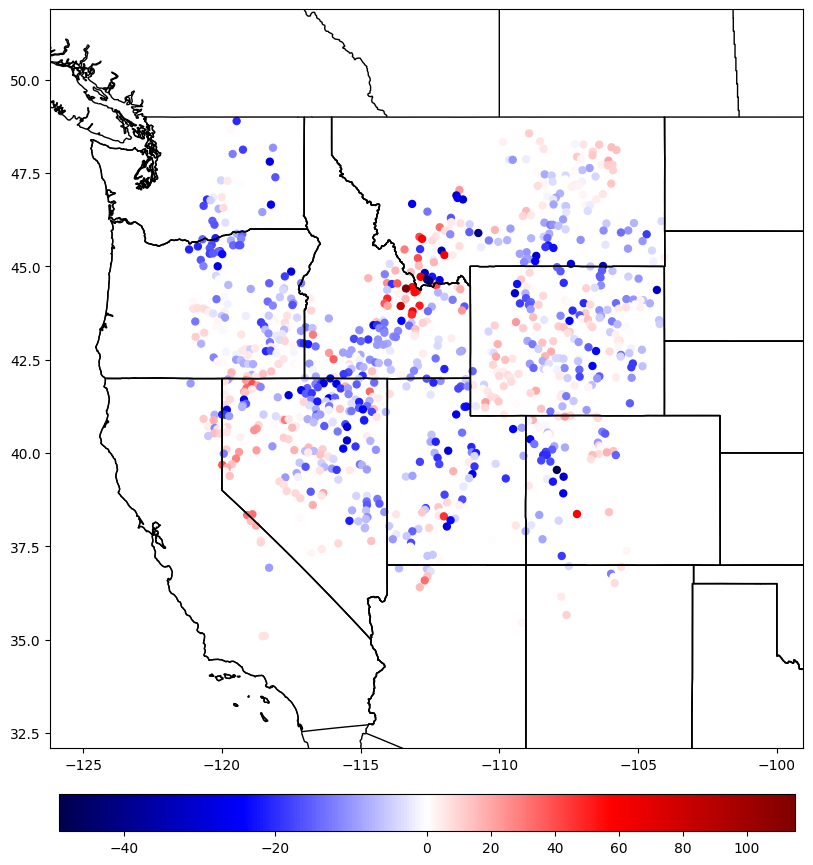

In [ ]:
from matplotlib.colors import TwoSlopeNorm
fig, ax = plt.subplots(figsize = (10,12))
ax.set_xlim(minx-5, maxx+5)
ax.set_ylim(miny-3, maxy+3)
#sage_loc_wgs84.plot(ax=ax,edgecolor='grey',facecolor='grey')
state_loc_wgs84.boundary.plot(ax=ax,
                              edgecolor='black',
                              linewidth=1)
nation_loc_wgs84.plot(ax=ax,
                              edgecolor='black',
                      linewidth=1)
plot_loc.plot(column='big_change2',
                         categorical=False,
                         marker='.',
                         legend=True,
                         markersize=100,
                         cmap='seismic',
                         ax=ax,
                         norm=TwoSlopeNorm(0),
                         legend_kwds={'shrink': .95,'location':'bottom','pad':0.05}
              )

plt.show()